# CSCE 633 HW2
### By Zheng Cheng 727006630

## Problem 1
### (a) Normalize the data. <br>
column 0 stands for class

In [1]:
import pandas as pd

# We transformed dataset to csv format
df_train = pd.read_csv('satimage.scale.training.csv')
df_test = pd.read_csv('satimage.scale.test.csv')
df_train.head()
df_test.head()

FileNotFoundError: [Errno 2] File b'satimage.scale.training.csv' does not exist: b'satimage.scale.training.csv'

In [4]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [5]:
from sklearn import preprocessing

# Normalize data
def normalize(data):
    std_scale = preprocessing.StandardScaler().fit(data)
    df_train_norm = std_scale.transform(data)
    # Convert back to dataframe
    training_norm_col = pd.DataFrame(df_train_norm, index=data.index, columns=data.columns)
    data.update(training_norm_col)

In [6]:
# we don't want column 0 to be normalized
df_train_first = df_train.drop(['0'], axis=1)
normalize(df_train_first)
df_train_first['0'] = df_train['0']
df_train = df_train_first
df_train.head()

,1,2,3,4,5,6,7,8,9,10,...,28,29,30,31,32,33,34,35,36,0
0,1.401487,1.050257,0.536469,0.165357,0.929079,0.631139,0.046959,-0.228967,0.610254,0.257249,...,-0.285221,0.595064,0.224590,-0.260340,-0.621785,-0.120219,-0.123790,-1.167932,-1.006992,6
1,1.401487,1.050257,1.035873,0.313540,1.535120,1.060349,0.905898,0.368136,1.238395,1.060453,...,-0.236009,0.381887,0.422218,-0.321210,-0.376463,0.421137,0.282417,-0.553770,-0.563413,6
2,1.401487,1.265418,0.536469,0.165357,1.131093,0.845744,0.046959,-0.029933,0.610254,0.458050,...,-1.023431,0.070320,-0.170668,-1.173392,-1.014301,0.077838,-0.419572,-1.659260,-1.351997,6
3,1.401487,1.050257,1.035873,0.313540,1.131093,1.060349,0.333272,0.119343,1.029015,0.658851,...,-0.580505,0.808242,0.422218,-0.321210,-0.376463,0.632397,0.282417,-0.553770,-0.563413,6
4,1.194570,1.050257,1.285575,0.115963,1.131093,0.845744,0.333272,-0.029933,0.819635,0.257249,...,-0.580505,0.381887,-0.170668,-1.051653,-0.965237,0.077838,-0.123790,-1.290763,-1.105565,6


In [7]:
df_test_first = df_test.drop(['0'], axis=1)
normalize(df_test_first)
df_test_first['0'] = df_test['0']
df_test = df_test_first
df_test.head()

,1,2,3,4,5,6,7,8,9,10,...,28,29,30,31,32,33,34,35,36,0
0,0.171664,0.724613,0.238191,0.129756,-0.087244,0.902136,0.548543,0.136669,-0.356418,0.429808,...,-0.243399,-0.625746,0.154612,-0.377147,-0.237394,-0.624325,0.323258,0.342677,0.107729,1
1,0.171664,0.883758,0.473951,0.177480,-0.291878,0.741941,0.490250,0.373676,-0.286866,0.915392,...,0.044453,-0.835044,0.437807,0.506214,0.243924,-0.835103,0.282624,0.284116,0.059692,1
2,0.171664,0.883758,1.063350,0.559274,-0.087244,0.261354,0.023889,-0.242543,-0.634626,0.106087,...,0.668133,-0.067620,1.125565,1.154011,0.677109,-0.343288,0.770238,0.635475,0.492017,1
3,0.171664,0.883758,1.063350,0.559274,-0.087244,0.902136,1.073199,0.373676,-0.356418,1.077253,...,0.812059,0.211444,1.287391,1.801808,0.821505,0.218787,1.298487,1.806670,0.828270,1
4,0.171664,1.042903,0.532892,0.368377,-0.087244,0.421549,0.257068,0.136669,-0.078210,0.429808,...,0.284329,-0.067620,0.761459,0.623994,0.099528,-0.062251,0.607699,0.342677,0.107729,1


## (b) Hyperparameter Tuning

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import Imputer
from sklearn.metrics import classification_report, accuracy_score
import math  

def kfold_ndegree_svm(X, y, kfold, c, d):
    err = 0
    kf = StratifiedKFold(n_splits=kfold)
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index].values.ravel(), y.iloc[test_index].values.ravel()
        svm = SVC(C=c, kernel='poly', tol=1e-7, gamma = 'auto',  shrinking=False, degree = d)
        svm.fit(X_train, y_train)
        pred = svm.predict(X_test)
        err += pow(accuracy_score(y_test, pred, normalize=True, sample_weight=None),2)
    err /= 10;
    err = 1 - math.sqrt(err)
    return err

C: 0.1  d: 1  error: 0.144438592931751
C: 1  d: 1  error: 0.11702424463448302
C: 10  d: 1  error: 0.11250967809455503
C: 20  d: 1  error: 0.11702838284724926
C: 50  d: 1  error: 0.11893968397846144
C: 100  d: 1  error: 0.12237271619338763
C: 500  d: 1  error: 0.12109740738469721
C: 1000  d: 1  error: 0.12783840694154913


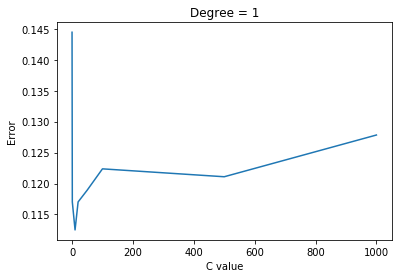

C: 0.1  d: 2  error: 0.23097806096485562
C: 1  d: 2  error: 0.14580382821363524
C: 10  d: 2  error: 0.11950144298814702
C: 20  d: 2  error: 0.11560090777832932
C: 50  d: 2  error: 0.11318727440263099
C: 100  d: 2  error: 0.11160979468335608
C: 500  d: 2  error: 0.11940308230887065
C: 1000  d: 2  error: 0.12451700613459449


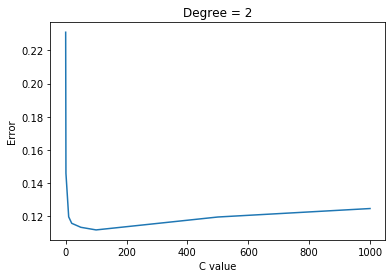

C: 0.1  d: 3  error: 0.24086074602216467
C: 1  d: 3  error: 0.14344198822651932
C: 10  d: 3  error: 0.11215209294472306
C: 20  d: 3  error: 0.10787093877551057
C: 50  d: 3  error: 0.10752031822833852
C: 100  d: 3  error: 0.10217365504037978
C: 500  d: 3  error: 0.10200878810930358
C: 1000  d: 3  error: 0.10512847034206863


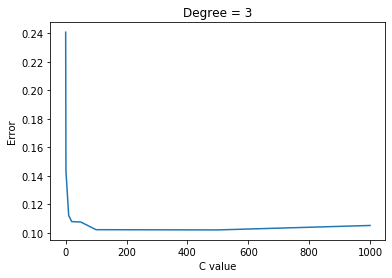

C: 0.1  d: 4  error: 0.3157622173801773
C: 1  d: 4  error: 0.22513204603569226
C: 10  d: 4  error: 0.15273659792675198
C: 20  d: 4  error: 0.1463529823359051
C: 50  d: 4  error: 0.13276769152340318
C: 100  d: 4  error: 0.13191493839996304
C: 500  d: 4  error: 0.12470351005382363
C: 1000  d: 4  error: 0.12693537452286507


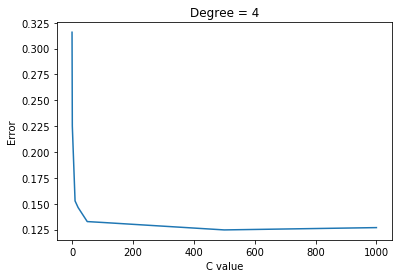

best pair: c: 1000 d: 4


In [14]:
import matplotlib.pyplot as plt

X_train = df_train.drop(['0'], axis=1)
X_test = df_test.drop(['0'], axis=1)
y_train = df_train['0']
y_test = df_test['0']

c_arr = [0.1,1,10,20,50,100,500,1000]
d_arr = [1,2,3,4]

min_error = 100
min_c = 0
min_d = 0

for d in d_arr:
    errors = []
    for c in c_arr:
        err = kfold_ndegree_svm(X_train, y_train, 10, c, d)
        errors.append(err)
        print('C:', c, ' d:', d, ' error:', err)
        if err < min_error:
            min_c = c
            min_d = d
    plt.plot(c_arr, errors)
    plt.title("Degree = "+str(d))
    plt.xlabel("C value");
    plt.ylabel("Error");
    plt.show()

print('best pair: c:', min_c, 'd:', min_d)

(c) Model Training and Testing

C: 0.1  d: 1  error: 0.144438592931751
C: 0.1  d: 2  error: 0.23097806096485562
C: 0.1  d: 3  error: 0.24086074602216467
C: 0.1  d: 4  error: 0.3157622173801773


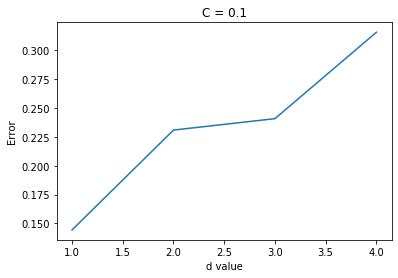

C: 1  d: 1  error: 0.11702424463448302
C: 1  d: 2  error: 0.14580382821363524
C: 1  d: 3  error: 0.14344198822651932
C: 1  d: 4  error: 0.22513204603569226


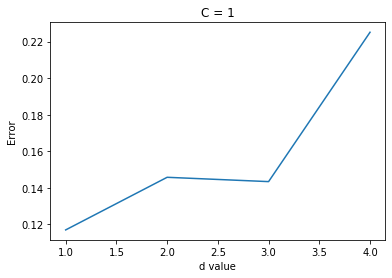

C: 10  d: 1  error: 0.11250967809455503
C: 10  d: 2  error: 0.11950144298814702
C: 10  d: 3  error: 0.11215209294472306
C: 10  d: 4  error: 0.15273659792675198


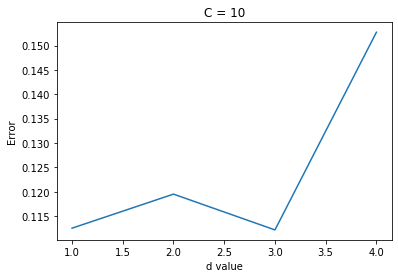

C: 20  d: 1  error: 0.11702838284724926
C: 20  d: 2  error: 0.11560090777832932
C: 20  d: 3  error: 0.10787093877551057
C: 20  d: 4  error: 0.1463529823359051


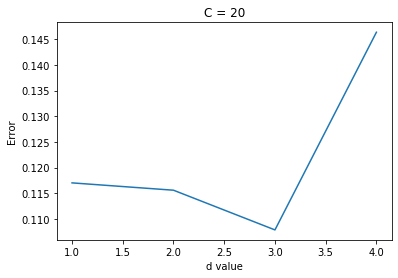

C: 50  d: 1  error: 0.11893968397846144
C: 50  d: 2  error: 0.11318727440263099
C: 50  d: 3  error: 0.10752031822833852
C: 50  d: 4  error: 0.13276769152340318


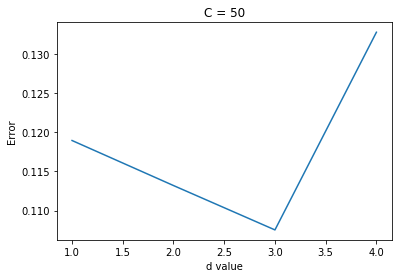

C: 100  d: 1  error: 0.12237271619338763
C: 100  d: 2  error: 0.11160979468335608
C: 100  d: 3  error: 0.10217365504037978
C: 100  d: 4  error: 0.13191493839996304


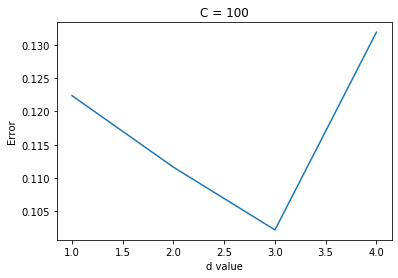

C: 500  d: 1  error: 0.12109740738469721
C: 500  d: 2  error: 0.11940308230887065
C: 500  d: 3  error: 0.10200878810930358
C: 500  d: 4  error: 0.12470351005382363


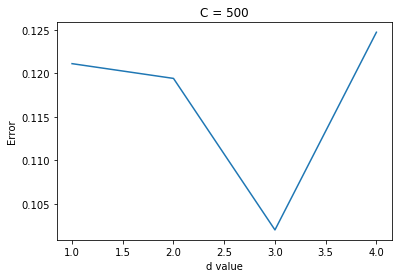

C: 1000  d: 1  error: 0.12783840694154913
C: 1000  d: 2  error: 0.12451700613459449
C: 1000  d: 3  error: 0.10512847034206863
C: 1000  d: 4  error: 0.12693537452286507


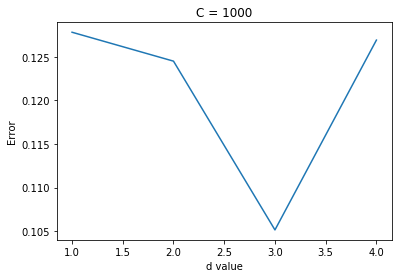

In [17]:
for c in c_arr:
    errors = []
    for d in d_arr:
        err = kfold_ndegree_svm(X_train, y_train, 10, c, d)
        errors.append(err)
        print('C:', c, ' d:', d, ' error:', err)
        if err < min_error:
            min_c = c
            min_d = d
    plt.plot(d_arr, errors)
    plt.title("C = "+str(c))
    plt.xlabel("d value");
    plt.ylabel("Error");
    plt.show()

### (d) Results evaluation, Plot the average number of support vectors obtained as a function of d


C: 0.1  d: 1  support vector: 1006.9
C: 0.1  d: 2  support vector: 1179.9
C: 0.1  d: 3  support vector: 1013.0
C: 0.1  d: 4  support vector: 1209.5
C: 0.1  d: 5  support vector: 1138.5
C: 0.1  d: 6  support vector: 1255.3
C: 0.1  d: 7  support vector: 1217.1
C: 0.1  d: 8  support vector: 1282.5
C: 0.1  d: 9  support vector: 1257.8
C: 0.1  d: 10  support vector: 1302.2


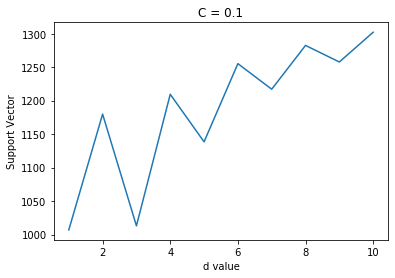

C: 1  d: 1  support vector: 663.1
C: 1  d: 2  support vector: 812.0
C: 1  d: 3  support vector: 692.7
C: 1  d: 4  support vector: 874.1
C: 1  d: 5  support vector: 817.5
C: 1  d: 6  support vector: 972.8
C: 1  d: 7  support vector: 960.5
C: 1  d: 8  support vector: 1086.2
C: 1  d: 9  support vector: 1066.2
C: 1  d: 10  support vector: 1148.4


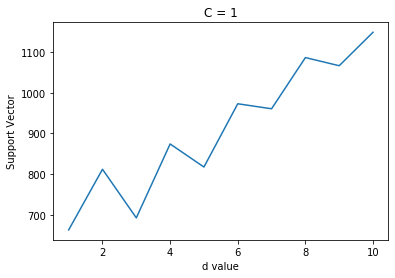

C: 10  d: 1  support vector: 537.9
C: 10  d: 2  support vector: 624.9
C: 10  d: 3  support vector: 536.6
C: 10  d: 4  support vector: 686.3
C: 10  d: 5  support vector: 675.9
C: 10  d: 6  support vector: 803.1
C: 10  d: 7  support vector: 764.9
C: 10  d: 8  support vector: 893.3
C: 10  d: 9  support vector: 869.0
C: 10  d: 10  support vector: 983.6


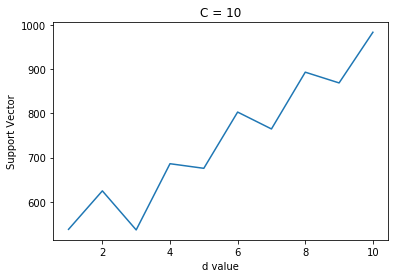

C: 20  d: 1  support vector: 515.3
C: 20  d: 2  support vector: 605.3
C: 20  d: 3  support vector: 523.2
C: 20  d: 4  support vector: 657.4
C: 20  d: 5  support vector: 635.5
C: 20  d: 6  support vector: 784.7
C: 20  d: 7  support vector: 736.8
C: 20  d: 8  support vector: 852.7
C: 20  d: 9  support vector: 823.7
C: 20  d: 10  support vector: 938.3


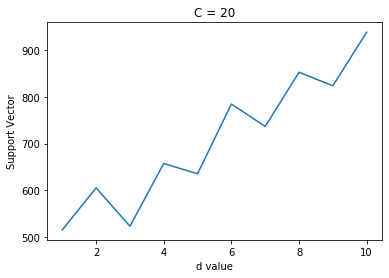

C: 50  d: 1  support vector: 491.7
C: 50  d: 2  support vector: 585.0
C: 50  d: 3  support vector: 516.3
C: 50  d: 4  support vector: 631.7
C: 50  d: 5  support vector: 596.5
C: 50  d: 6  support vector: 739.6
C: 50  d: 7  support vector: 710.8
C: 50  d: 8  support vector: 817.7
C: 50  d: 9  support vector: 775.5
C: 50  d: 10  support vector: 894.4


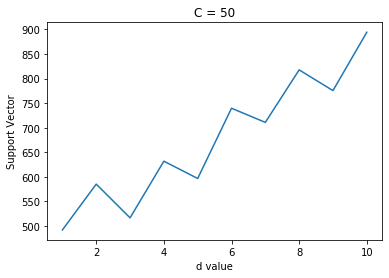

C: 100  d: 1  support vector: 481.6
C: 100  d: 2  support vector: 579.1
C: 100  d: 3  support vector: 516.7
C: 100  d: 4  support vector: 623.7
C: 100  d: 5  support vector: 565.9
C: 100  d: 6  support vector: 709.0
C: 100  d: 7  support vector: 684.6
C: 100  d: 8  support vector: 796.9
C: 100  d: 9  support vector: 747.0
C: 100  d: 10  support vector: 859.9


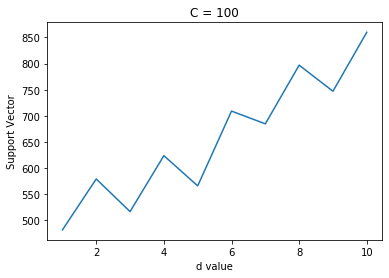

C: 500  d: 1  support vector: 464.0
C: 500  d: 2  support vector: 578.8
C: 500  d: 3  support vector: 509.1
C: 500  d: 4  support vector: 609.5
C: 500  d: 5  support vector: 541.8
C: 500  d: 6  support vector: 650.7
C: 500  d: 7  support vector: 628.2
C: 500  d: 8  support vector: 760.2
C: 500  d: 9  support vector: 712.7
C: 500  d: 10  support vector: 816.8


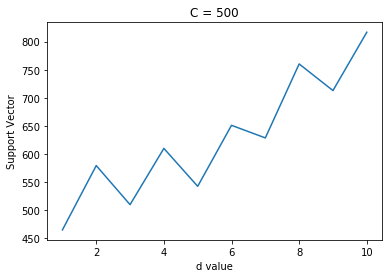

C: 1000  d: 1  support vector: 462.1
C: 1000  d: 2  support vector: 591.1
C: 1000  d: 3  support vector: 506.7
C: 1000  d: 4  support vector: 604.3
C: 1000  d: 5  support vector: 526.0
C: 1000  d: 6  support vector: 634.6
C: 1000  d: 7  support vector: 596.0
C: 1000  d: 8  support vector: 733.3
C: 1000  d: 9  support vector: 701.7
C: 1000  d: 10  support vector: 801.8


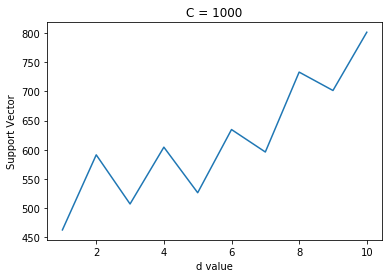

In [19]:
def sv_kfold_ndegree_svm(X, y, kfold, c, d):
    err = 0
    kf = StratifiedKFold(n_splits=kfold)
    sv = 0
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index].values.ravel(), y.iloc[test_index].values.ravel()
        svm = SVC(C=c, kernel='poly', tol=1e-7, gamma = 'auto',  shrinking=False, degree = d)
        svm.fit(X_train, y_train)
        pred = svm.predict(X_test)
        sv += len(svm.support_vectors_)
    sv /= kfold
    return sv

d_arr = [1,2,3,4,5,6,7,8,9,10]
for c in c_arr:
    sv_sum = []
    for d in d_arr:
        sv = sv_kfold_ndegree_svm(X_train, y_train, 10, c, d)
        sv_sum.append(sv)
        print('C:', c, ' d:', d, ' support vector:', sv)
    plt.plot(d_arr, sv_sum)
    plt.title("C = "+str(c))
    plt.xlabel("d value");
    plt.ylabel("Support Vector");
    plt.show()

### (e) No clue.
### (f) When degree goes larger, model is more complicated. It's easier for train data to fit. It also causes a larger possibiliy to overfit.
### (g) γ=sigma^2/1, thus the larger is γ, the more complicated is model.easier to fit as well as overfit.

## Problem 2

(1)From the equation:
$$
\sum_{i=1}^{n}\left(y_{i}-\hat{\beta}_{0}-\sum_{j=1}^{p} \hat{\beta}_{j} x_{j}\right)^{2}+\lambda \sum_{i=1}^{p} \hat{\beta}_{j}^{2}
$$
In this case, we get:
$$
\hat{\beta}_{0}=0 \text { and } n=p=2
$$
$$
\left(y_{1}-\hat{\beta}_{1} x_{11}-\hat{\beta}_{2} x_{12}\right)^{2}+\left(y_{2}-\hat{\beta}_{1} x_{21}-\hat{\beta}_{2} x_{22}\right)^{2}+\lambda\left(\hat{\beta}_{1}^{2}+\hat{\beta}_{2}^{2}\right)
$$
(2)

$$
\begin{aligned} \hat{\beta}_{1}^{*} &=\frac{x_{1} y_{1}+x_{2} y_{2}-\hat{\beta}_{2}^{*}\left(x_{1}^{2}+x_{2}^{2}\right)}{\lambda+x_{1}^{2}+x_{2}^{2}} \\ \hat{\beta}_{2}^{*} &=\frac{x_{1} y_{1}+x_{2} y_{2}-\hat{\beta}_{1}^{*}\left(x_{1}^{2}+x_{2}^{2}\right)}{\lambda+x_{1}^{2}+x_{2}^{2}} \end{aligned}
$$
(3)
$$
\left(y_{1}-\hat{\beta}_{1} x_{11}-\hat{\beta}_{2} x_{12}\right)^{2}+\left(y_{2}-\hat{\beta}_{1} x_{21}-\hat{\beta}_{2} x_{22}\right)^{2}+\lambda\left(\left|\hat{\beta}_{1}\right|+\left|\hat{\beta}_{2}\right|\right)
$$
(4)
This optimization problem can be simplified to:
$$\hat{\beta}_{1}+\hat{\beta}_{2}=\frac{y_{1}}{x_{11}}$$
This line touches $$
\hat{\beta}_{1}+\hat{\beta}_{2}=s
$$ multiple times, and the entire line is a solution to the problem.
The general solution would be like:
$$
\hat{\beta}_{1}+\hat{\beta}_{2}=s ; \hat{\beta}_{1} \geq 0 ; \hat{\beta}_{2} \geq 0 ; \text { and } \hat{\beta}_{1}+\hat{\beta}_{2}=-s ; \hat{\beta}_{1} \leq 0 ; \hat{\beta}_{2} \leq 0
$$

## Problem 3

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

df = pd.read_csv('hw2_question3.csv')
df.head()
df.columns = ['Clump Thickness', 
              'Uniformity of Cell Size', 
              'Uniformity of Cell Shape', 
              'Marginal Adhesion', 
              'Single Epithelial Cell Size', 
              'Bare Nuclei', 
              'Bland Chromatin',
              'Normal Nucleoli',
              'Mitoses',
              'benign2malignant4']
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,benign2malignant4
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


In [22]:
df.groupby('benign2malignant4').size()

benign2malignant4
2    443
4    239
dtype: int64

They are not equally represented in data.

In [25]:
feature_cols = ['Clump Thickness', 
              'Uniformity of Cell Size', 
              'Uniformity of Cell Shape', 
              'Marginal Adhesion', 
              'Single Epithelial Cell Size', 
              'Bare Nuclei', 
              'Bland Chromatin',
              'Normal Nucleoli',
              'Mitoses']
X = df[feature_cols]
y = df['benign2malignant4']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

### Make a decision tree by entropy

In [26]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9429824561403509


Visualization

/Users/retard/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


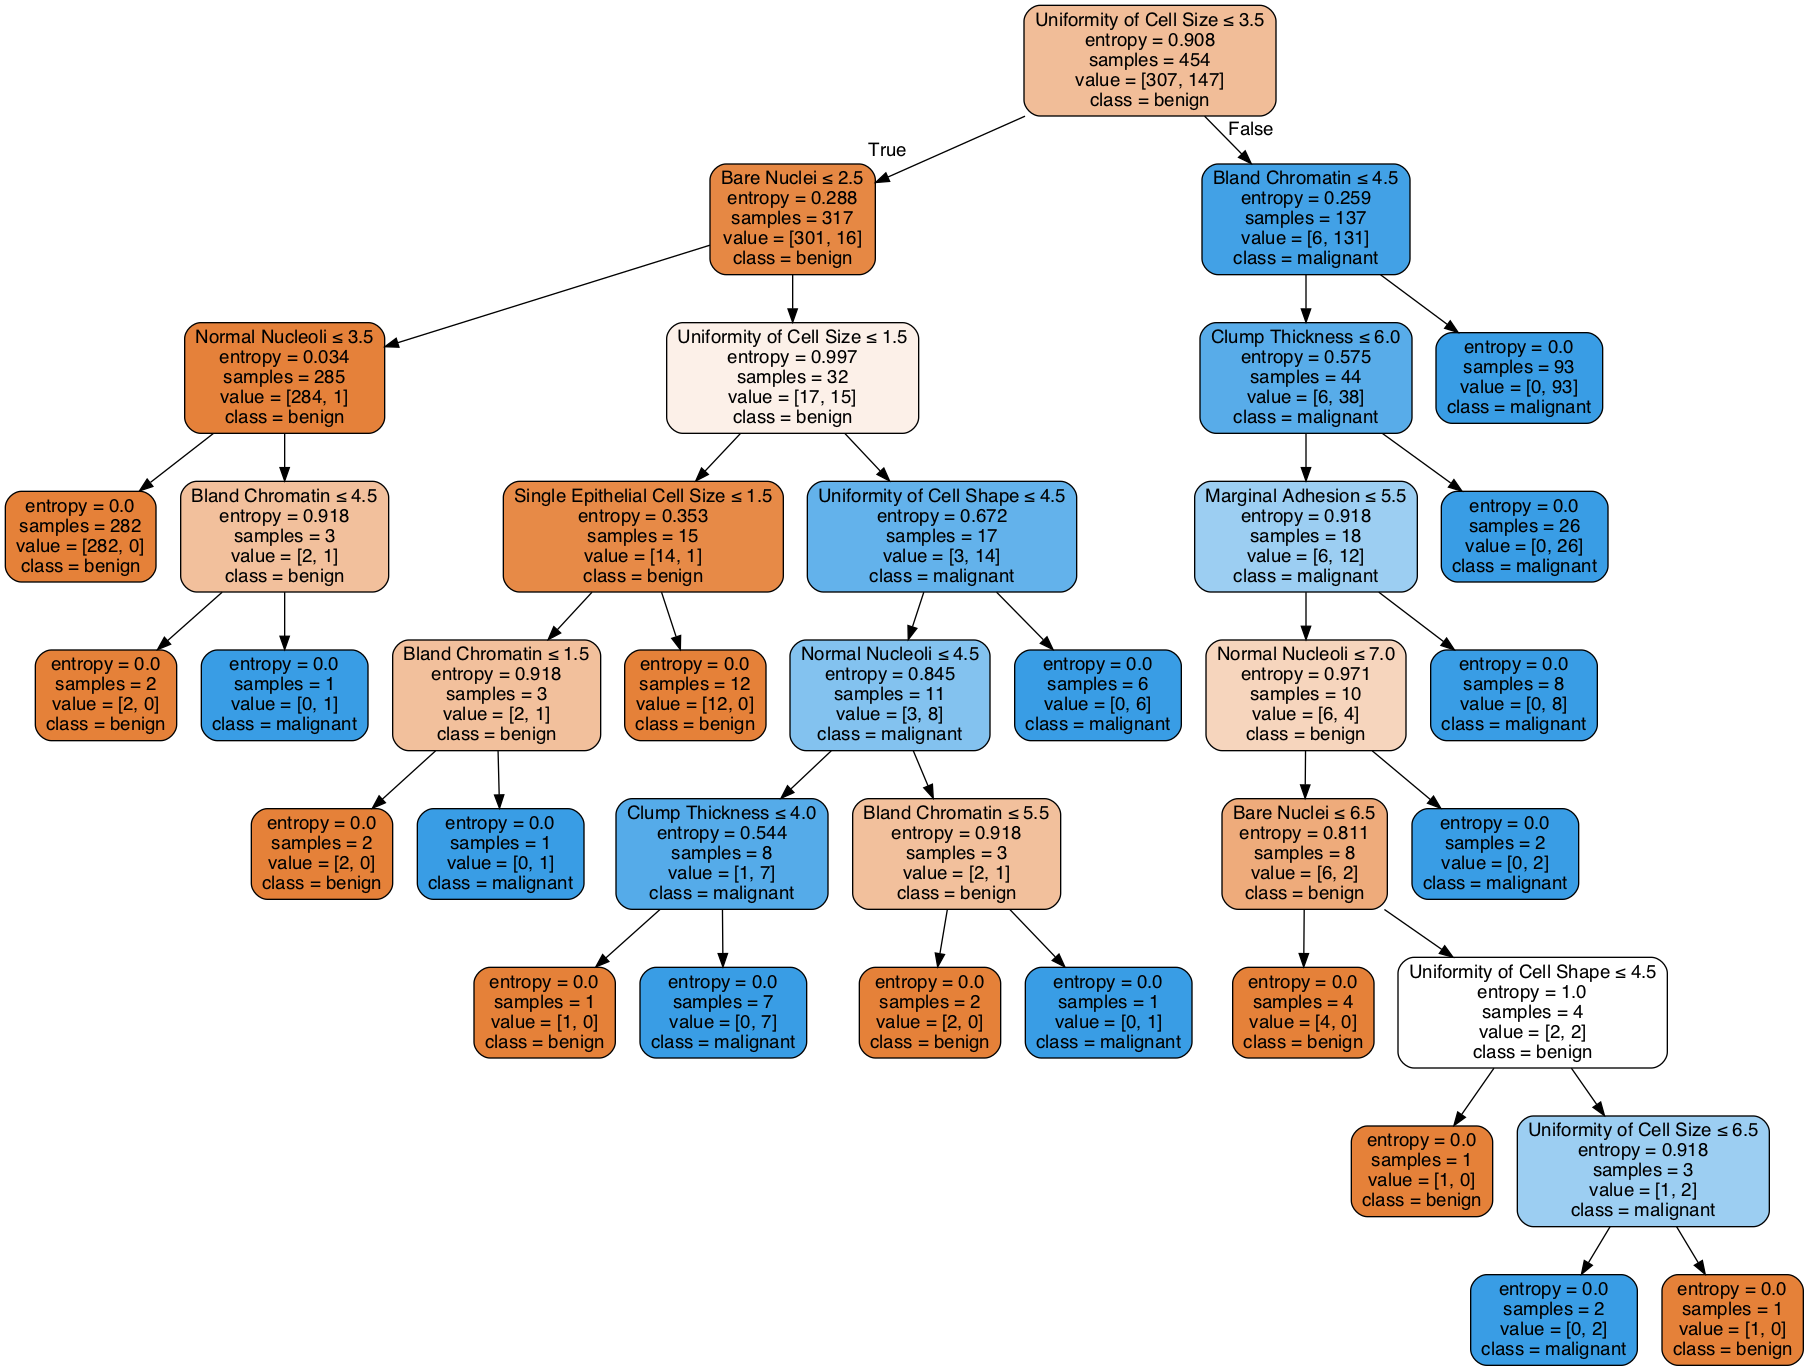

In [28]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['benign','malignant'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

### Make a decision tree by gini index

In [29]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9429824561403509


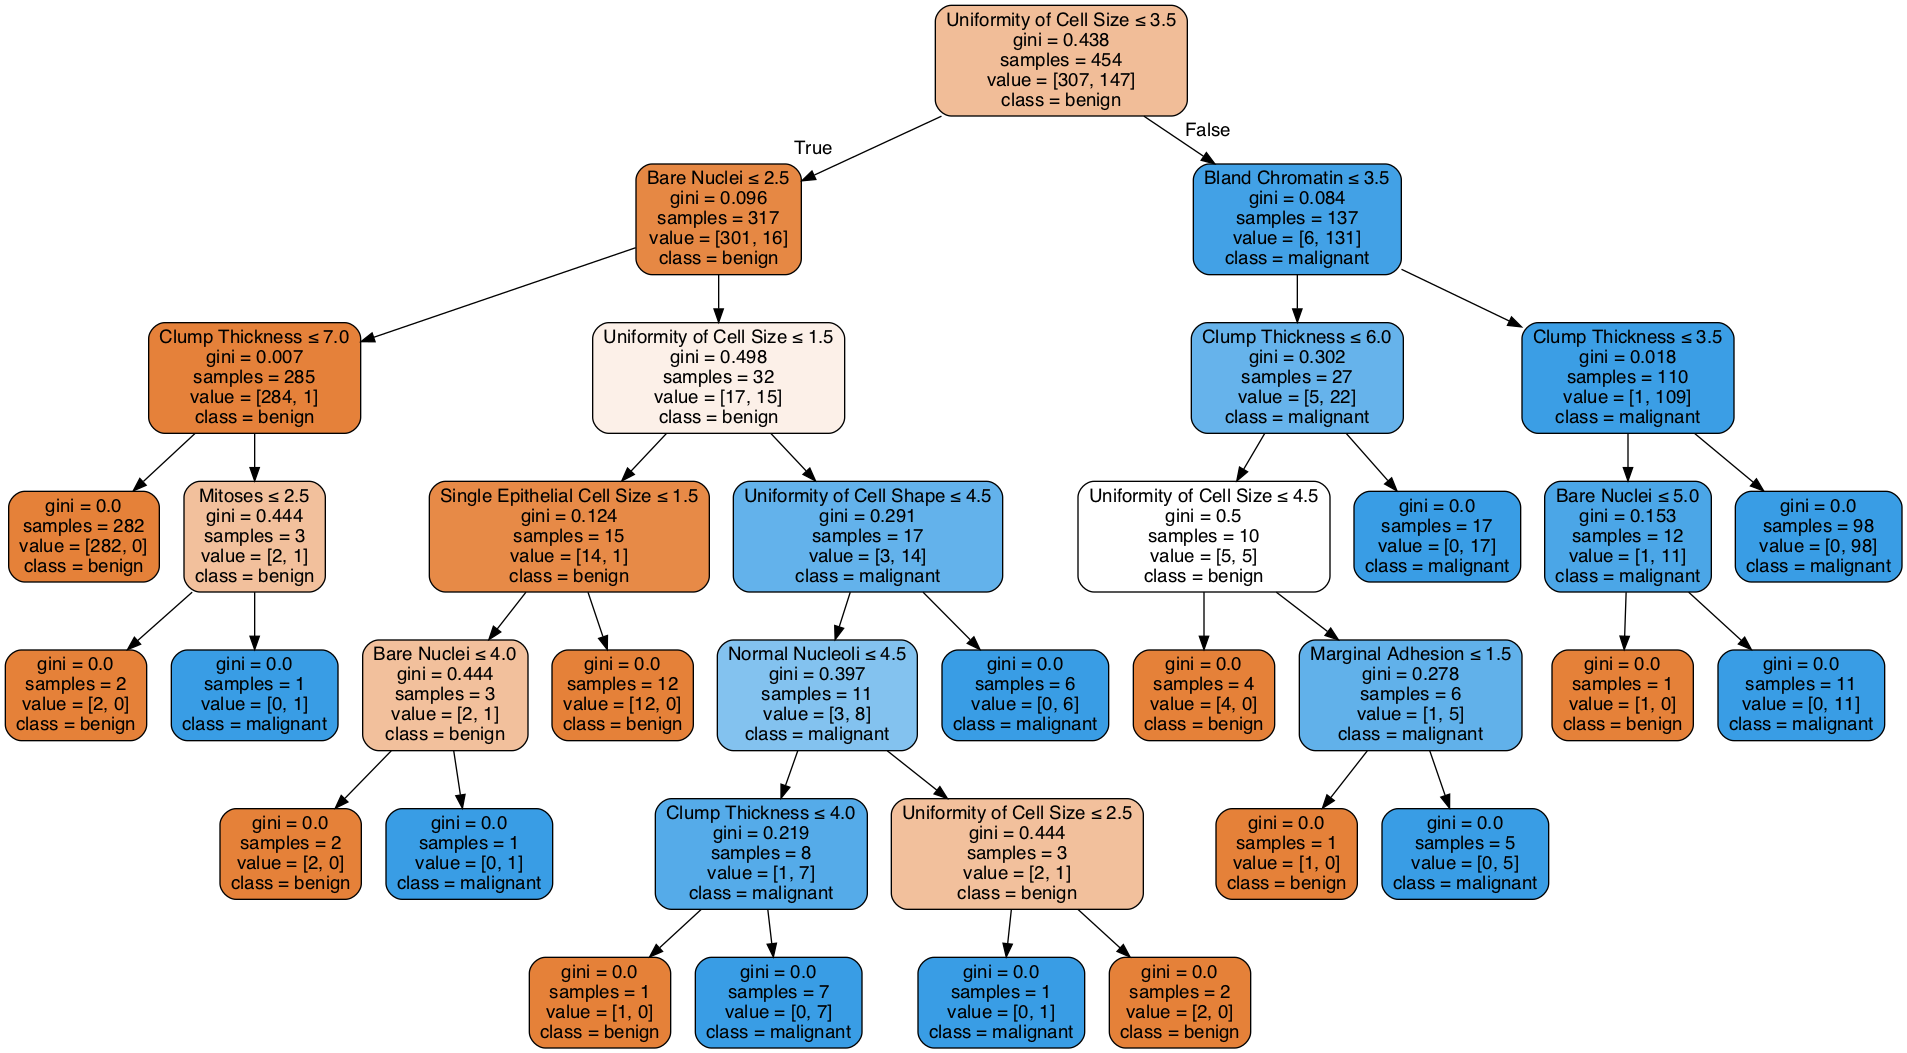

In [30]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['benign','malignant'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

### Plot the 10-fold stratified cross validated accuracy on the train and test data while the maximum depth in the tree increases

In [31]:
from sklearn.model_selection import cross_val_score
import numpy as np


accuracy_entropy = []
accuracy_gini = []
for depth in range(1,11):
    clf_gini = DecisionTreeClassifier(max_depth=depth) # gini
    scores_gini = cross_val_score(clf_gini, X, y, cv=10)
    clf_entropy = DecisionTreeClassifier(max_depth=depth)
    scores_entropy = cross_val_score(clf_entropy, X, y, cv=10)
    accuracy_entropy.append(np.mean(scores_entropy))
    accuracy_gini.append(np.mean(scores_gini))
    
print(accuracy_entropy)
print(accuracy_gini)

[0.9019162499522844, 0.938532401928974, 0.9269175223626116, 0.9488265195760329, 0.953196294741128, 0.9458853431054445, 0.9487412680841316, 0.9443501800460611, 0.9502338053975645, 0.9516398188087694]
[0.9019162499522844, 0.93706181369368, 0.9283881105979056, 0.9488265195760329, 0.9517037574276952, 0.9473346184677635, 0.9384891399778599, 0.9487199552111564, 0.9429234899670446, 0.9429015408889058]


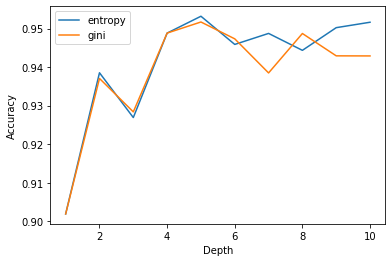

In [32]:
import matplotlib.pyplot as plt 
%matplotlib inline

depth = []
for d in range(1, 11):
    depth.append(d)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.plot(depth, accuracy_entropy, label='entropy')
plt.plot(depth, accuracy_gini, label='gini')
plt.legend(loc='upper left')

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

To be honest, they are quite similiar. Once the depth goes over 10, accuracy doesn't change really since 10 depth is almost enough for this dataset.

### Run a 10-fold stratified cross-validation for modeling this problem with a random forest model.

In [38]:
labels = np.array(df['benign2malignant4'])
features= df.drop('benign2malignant4', axis = 1)
feature_list = list(features.columns)
features = np.array(features)

In [39]:
from sklearn.model_selection import KFold # import KFold

kf = KFold(n_splits=10)
kf.get_n_splits(features)
print(kf)

KFold(n_splits=10, random_state=None, shuffle=False)


In [40]:
from sklearn.ensemble import RandomForestRegressor

importances = [0] * len(feature_list)
print(type(importances))
accuracies = 0;
for train_index, test_index in kf.split(features):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
    rf.fit(X_train, y_train);
    pred = rf.predict(X_test)
    errors = abs(pred-y_test)
    print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
    mape = 100 * (errors / y_test)
    accuracy = 100 - np.mean(mape)
    accuracies += accuracy
    print('Accuracy:', round(accuracy, 2), '%.')
    cur_importances = list(rf.feature_importances_)
    for i in range(0, len(cur_importances)):
        importances[i] += float(cur_importances[i])
    
for i in range(0,len(importances)):
    importances[i] /= 10.0
feature_importances = [(feature, round(importance,2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x : x[1], reverse=True)
print(feature_importances)
accuracies /= 10.0
print('average accuracy:', accuracies)

<class 'list'>
Mean Absolute Error: 0.29 degrees.
Accuracy: 91.09 %.
Mean Absolute Error: 0.14 degrees.
Accuracy: 95.76 %.
Mean Absolute Error: 0.08 degrees.
Accuracy: 96.94 %.
Mean Absolute Error: 0.17 degrees.
Accuracy: 93.64 %.
Mean Absolute Error: 0.22 degrees.
Accuracy: 92.14 %.
Mean Absolute Error: 0.07 degrees.
Accuracy: 96.97 %.
Mean Absolute Error: 0.09 degrees.
Accuracy: 96.65 %.
Mean Absolute Error: 0.04 degrees.
Accuracy: 98.13 %.
Mean Absolute Error: 0.07 degrees.
Accuracy: 97.75 %.
Mean Absolute Error: 0.05 degrees.
Accuracy: 98.22 %.
[('Uniformity of Cell Size', 0.54), ('Uniformity of Cell Shape', 0.2), ('Bare Nuclei', 0.12), ('Clump Thickness', 0.04), ('Bland Chromatin', 0.03), ('Normal Nucleoli', 0.03), ('Marginal Adhesion', 0.02), ('Single Epithelial Cell Size', 0.02), ('Mitoses', 0.01)]
average accuracy: 95.72890451832906


In [43]:
print(type(feature_importances))

<class 'list'>


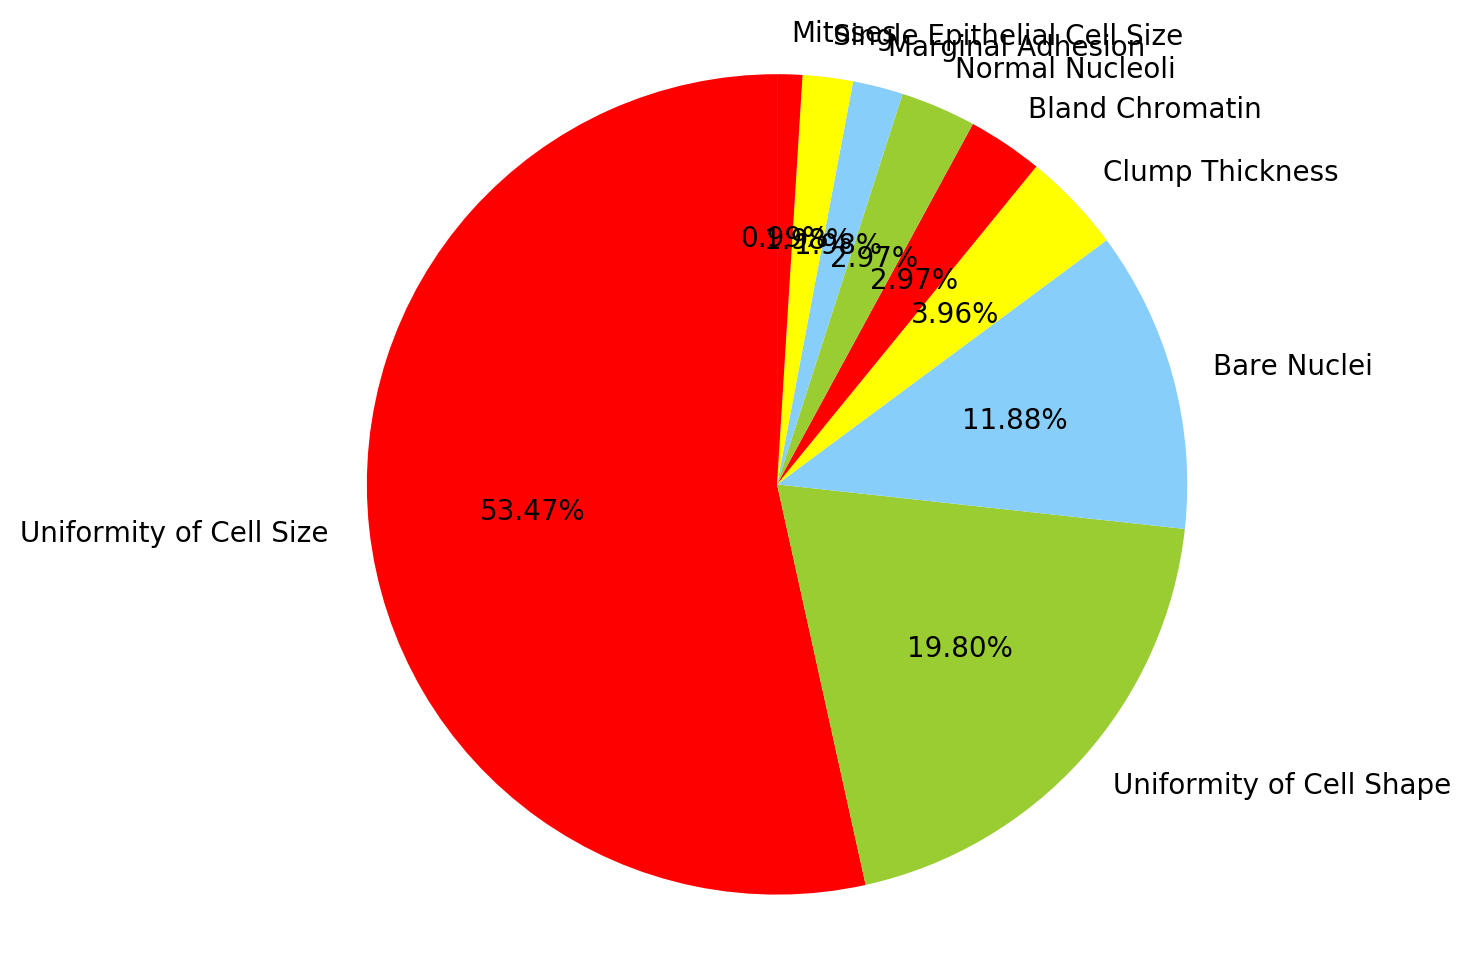

In [68]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=200, facecolor='w', edgecolor='k')

t = np.asarray(feature_importances)
labels = t[:,0]
sizes = t[:,1]

explode = (0,0,0,0,0,0,0,0,0) #将某一块分割出来，值越大分割出的间隙越大
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%', 
                      shadow = False, 
                      startangle =90) 
plt.axis('equal')
plt.show()